# Project

In [2]:
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import NLTK for stop words
import nltk
from nltk.corpus import stopwords
from string import punctuation

In [3]:
df = pd.read_csv('twitter_training.csv')

## Preprocessing

In [4]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df.columns = ['Number' , 'Name','Sentiment','Text']
df.head()

,Number,Name,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
df = df.drop(columns=['Number'])
df.head()

,Name,Sentiment,Text
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
# Check the null value counts in the DataFrame before dropping rows
print("Null value counts before dropping rows:")
print(df.isnull().sum())

# Drop rows where any column has null values
df = df.dropna()

# Check the null value counts in the cleaned DataFrame
print("\nNull value counts after dropping rows with any null values:")
print(df.isnull().sum())


Null value counts before dropping rows:
Name           0
Sentiment      0
Text         686
dtype: int64

Null value counts after dropping rows with any null values:
Name         0
Sentiment    0
Text         0
dtype: int64


In [8]:
print(df.shape)

(73995, 3)


In [9]:
print(df.dtypes)

Name         object
Sentiment    object
Text         object
dtype: object


In [10]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


In [11]:
sentiment_mapping={"Negative" : 0}
df['Sentiment'] = df['Sentiment'].replace(sentiment_mapping)

sentiment_mapping={"Irrelevant" : 1}
df['Sentiment'] = df['Sentiment'].replace(sentiment_mapping)

sentiment_mapping={"Neutral" : 2}
df['Sentiment'] = df['Sentiment'].replace(sentiment_mapping)

sentiment_mapping={"Positive" : 3}
df['Sentiment'] = df['Sentiment'].replace(sentiment_mapping)

In [12]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
0    22358
3    20654
2    18108
1    12875
Name: count, dtype: int64


In [13]:
# df['Name'] = df['Name'].apply(lambda x: x.lower())
# df['Text'] = df['Text'].apply(lambda x: x.lower())
# df.head()

## Natural Language Processing

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import re

# Download NLTK resources if not already downloaded
#nltk.download('punkt')
#nltk.download('stopwords')

# Initialize NLTK's stopwords list and punctuation set
stop_words = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)

def remove_stopwords_and_punctuations(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Filter out tokens that are stopwords or punctuation
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token.lower() not in punctuation_set]
    
    # Remove tokens like "n't", "..."
    filtered_text = [re.sub(r'(n\'t|\'m|\'s|\'re|\'ll|\'ve|\'d|\.\.\.|-)', '', token) for token in filtered_tokens if token]


    # Join the filtered tokens back into a string
    filtered_text = ' '.join(filtered_text)
    
    return filtered_text

# Apply the function to 'Text' column
df['Text'] = df['Text'].apply(remove_stopwords_and_punctuations)

# Print the updated DataFrame
print(df.head(20))  # Print first 20 rows to check the result

           Name  Sentiment                                               Text
0   Borderlands          3                                coming borders kill
1   Borderlands          3                        im getting borderlands kill
2   Borderlands          3                       im coming borderlands murder
3   Borderlands          3                    im getting borderlands 2 murder
4   Borderlands          3                      im getting borderlands murder
5   Borderlands          3  spent hours making something fun  know HUGE Bo...
6   Borderlands          3  spent couple hours something fun   know  huge ...
7   Borderlands          3  spent hours something fun   know  HUGE Borderl...
8   Borderlands          3  spent hours making something fun  know HUGE Rh...
9   Borderlands          3  2010 spent hours making something fun  know HU...
10  Borderlands          3                                                   
11  Borderlands          2  RockHard La Varlope RARE POWERFUL HA

In [15]:
#Convert uppercase letters to lowercase
df["Text"] = df["Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))
print(df.head(50))

           Name  Sentiment                                               Text
0   Borderlands          3                                coming borders kill
1   Borderlands          3                        im getting borderlands kill
2   Borderlands          3                       im coming borderlands murder
3   Borderlands          3                    im getting borderlands 2 murder
4   Borderlands          3                      im getting borderlands murder
5   Borderlands          3  spent hours making something fun know huge bor...
6   Borderlands          3  spent couple hours something fun know huge bor...
7   Borderlands          3  spent hours something fun know huge borderland...
8   Borderlands          3  spent hours making something fun know huge rha...
9   Borderlands          3  2010 spent hours making something fun know hug...
10  Borderlands          3                                                   
11  Borderlands          2  rockhard la varlope rare powerful ha

In [16]:
from nltk.tokenize import word_tokenize

def remove_numbers(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Define a regex pattern to match digits
    pattern = re.compile(r'\d+')
    
    # Filter out words that are digits
    words = [word for word in words if not pattern.match(word)]
    
    # Join the words back into a single string
    clean_text = ' '.join(words)
    
    return clean_text
    
df['Text'] = df['Text'].apply(remove_numbers)
print(df.head(50))

           Name  Sentiment                                               Text
0   Borderlands          3                                coming borders kill
1   Borderlands          3                        im getting borderlands kill
2   Borderlands          3                       im coming borderlands murder
3   Borderlands          3                      im getting borderlands murder
4   Borderlands          3                      im getting borderlands murder
5   Borderlands          3  spent hours making something fun know huge bor...
6   Borderlands          3  spent couple hours something fun know huge bor...
7   Borderlands          3  spent hours something fun know huge borderland...
8   Borderlands          3  spent hours making something fun know huge rha...
9   Borderlands          3  spent hours making something fun know huge rha...
10  Borderlands          3                                                   
11  Borderlands          2  rockhard la varlope rare powerful ha

## Train Test Split Data

In [17]:
from sklearn.model_selection import train_test_split

X = df.Text
y = df.Sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(47356,)
(14799,)
(11840,)
(47356,)
(14799,)
(11840,)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_valid_tfidf = vectorizer.transform(X_valid)

In [22]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(X_valid_tfidf.shape)

(47356, 28649)
(14799, 28649)
(11840, 28649)


## Machine Learning Algorihtm Train

### GBM

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Naive Bayes classifier
gbm_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.3, max_depth=3,min_samples_split = 2)
gbm_model.fit(X_train_tfidf, y_train)


# Predict on the training set
y_train_pred = gbm_model.predict(X_train_tfidf)

# Predict on the test set
y_test_pred = gbm_model.predict(X_test_tfidf)

y_valid_pred = gbm_model.predict(X_valid_tfidf)


# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
classification_rep = classification_report(y_test, y_test_pred)

gbm_test_accuracy = test_accuracy

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Validation Accuracy: {:.2f}%".format(valid_accuracy * 100))
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Accuracy: 86.32%
Testing Accuracy: 74.18%
Validation Accuracy: 74.38%
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77      4534
           1       0.84      0.56      0.67      2574
           2       0.78      0.68      0.73      3554
           3       0.73      0.77      0.75      4137

    accuracy                           0.74     14799
   macro avg       0.76      0.72      0.73     14799
weighted avg       0.75      0.74      0.74     14799

Confusion Matrix:
 [[3921   98  199  316]
 [ 483 1442  221  428]
 [ 626   97 2415  416]
 [ 592   83  262 3200]]


### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Initialize and train the Naive Bayes classifier
dt_model =  DecisionTreeClassifier(random_state=42,max_depth = 100 , splitter = 'random' , criterion = 'log_loss' , max_features = None)
dt_model.fit(X_train_tfidf, y_train)

# Predict on the training set
y_train_pred = dt_model.predict(X_train_tfidf)

# Predict on the test set
y_test_pred = dt_model.predict(X_test_tfidf)

y_valid_pred = dt_model.predict(X_valid_tfidf)


# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
classification_rep = classification_report(y_test, y_test_pred)

dt_test_accuracy = test_accuracy


print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Validation Accuracy: {:.2f}%".format(valid_accuracy * 100))
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Accuracy: 80.42%
Testing Accuracy: 68.97%
Validation Accuracy: 69.53%
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.90      0.69      4534
           1       0.85      0.49      0.62      2574
           2       0.81      0.62      0.70      3554
           3       0.83      0.64      0.72      4137

    accuracy                           0.69     14799
   macro avg       0.76      0.66      0.68     14799
weighted avg       0.74      0.69      0.69     14799

Confusion Matrix:
 [[4088   80  187  179]
 [ 997 1265  144  168]
 [1077   66 2203  208]
 [1208   83  195 2651]]


### Random Forest

In [28]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Naive Bayes classifier
rf_model = RandomForestClassifier(n_estimators=500,max_depth = 100 , criterion='log_loss', min_samples_split = 10,random_state=42 ,n_jobs=8)
rf_model.fit(X_train_tfidf, y_train)

# Predict on the training set
y_train_pred = rf_model.predict(X_train_tfidf)

# Predict on the test set
y_test_pred = rf_model.predict(X_test_tfidf)


# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

rf_test_accuracy = test_accuracy

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Validation Accuracy: {:.2f}%".format(valid_accuracy * 100))
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Accuracy: 87.19%
Testing Accuracy: 77.82%
Validation Accuracy: 69.53%
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.94      0.81      4534
           1       0.99      0.47      0.63      2574
           2       0.89      0.70      0.78      3554
           3       0.75      0.86      0.80      4137

    accuracy                           0.78     14799
   macro avg       0.83      0.74      0.76     14799
weighted avg       0.81      0.78      0.77     14799

Confusion Matrix:
 [[4267    1   65  201]
 [ 672 1200  154  548]
 [ 645    5 2487  417]
 [ 482    3   89 3563]]


### SVM

In [30]:
 import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the SVM classifier
svm = SVC(kernel = 'rbf', C = 1 , gamma = 'scale' , class_weight = None)
svm.fit(X_train_tfidf, y_train)

# Predict on the test set
train_pred = svm.predict(X_train_tfidf)
test_pred = svm.predict(X_test_tfidf)
valid_pred = svm.predict(X_valid_tfidf)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
valid_accuracy = accuracy_score(y_valid, valid_pred)
report = classification_report(y_test, test_pred)

svm_test_accuracy = test_accuracy

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Validation Accuracy: {:.2f}%".format(valid_accuracy * 100))
print("Classification Report:")
print(report)
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))

Training Accuracy: 96.57%
Testing Accuracy: 90.78%
Validation Accuracy: 91.03%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4534
           1       0.95      0.87      0.91      2574
           2       0.93      0.89      0.91      3554
           3       0.86      0.94      0.89      4137

    accuracy                           0.91     14799
   macro avg       0.91      0.90      0.91     14799
weighted avg       0.91      0.91      0.91     14799

Confusion Matrix:
 [[4176   45   71  242]
 [ 103 2238   65  168]
 [ 131   39 3152  232]
 [ 136   42   90 3869]]


## Comparison

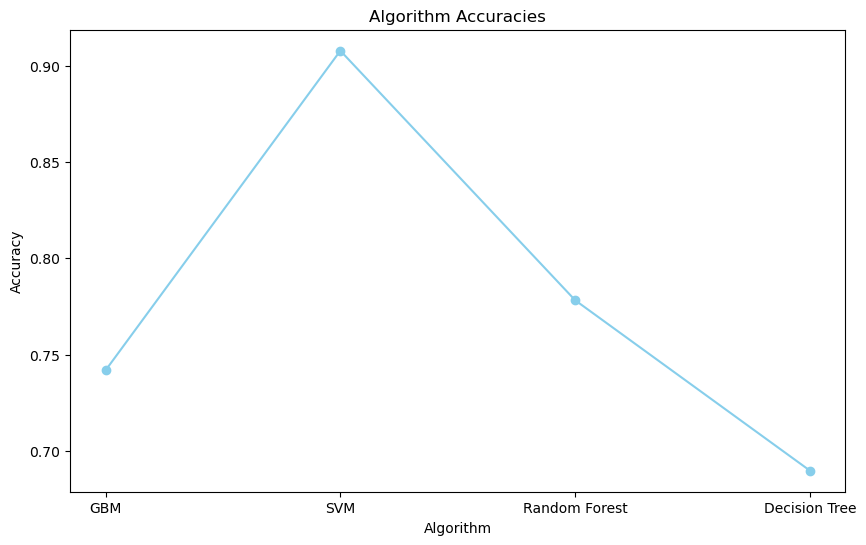

In [31]:
import matplotlib.pyplot as plt


# Data
algorithms = ['GBM','SVM','Random Forest','Decision Tree' ]
accuracies = [gbm_test_accuracy , svm_test_accuracy , rf_test_accuracy, dt_test_accuracy]

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(algorithms, accuracies, marker='o', linestyle='-', color='skyblue')

# Add title and labels
plt.title('Algorithm Accuracies')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')

# Display the plot
plt.show()
